# Minería de datos
## Práctica de visualización
### Base a trabajar: Estadísticas de suicidio de la OMS
##### URL: https://www.kaggle.com/szamil/who-suicide-statistics
#### Integrantes del Equipo 10, grupo 003:
- Andrea Isabel Cortez Sánchez 1736472
- Sergio Oviedo Martínez 1750532
- Andrés Hernandez de Luna 1757180
- Johan Antonio Sustaita Martinez 1723476

## Inicia actividad: 
### Mandamos llamar a nuestra base de datos
- Realizamos algunas acciones para poder visualizar y trabajar mejor.

Quisimos manejar el pequeño resumen desde el principio para ver las diferencias a lo largo del trabajo.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data1 = pd.read_csv("/Users/SERGIO/Documents/Mineria de datos/who_suicide_statistics.csv")
df = data1.rename(columns = {'country':'País','year':'Año','sex':'Género','age':'Rango_De_Edad','suicides_no':'Número_De_Suicidios','population':'Población'})
data = df_0 = df.fillna(0)
data.describe()

,Año,Número_De_Suicidios,Población
count,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,183.352865,1.456536e+06
std,10.338711,780.857898,3.456217e+06
min,1979.000000,0.000000,0.000000e+00
25%,1990.000000,0.000000,2.520000e+04
50%,1999.000000,11.000000,2.979955e+05
75%,2007.000000,83.000000,1.067009e+06
max,2016.000000,22338.000000,4.380521e+07


#### Información de estadística básica
- Por lo pronto nos enfocamos en la columna número cinco, para obtener información.

Si realizabamos directamente la función mean (o cualquier otra) con la columa 'Número_De_Suicidios' no tendría tanta coherencia por el echo de que nuestra base de datos contiene más de una fila de un mismo páis. Por lo que, con esta función sumamos el número de suicidios por país independientemente del rango de edad y año.

In [12]:
country = data["Número_De_Suicidios"].groupby(data["País"]).sum().sort_values(ascending=False)
country.head(15)

País
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Italy                        157074.0
Hungary                      130018.0
Thailand                     129899.0
Canada                       128382.0
Kazakhstan                   123151.0
Name: Número_De_Suicidios, dtype: float64

 En la parte superior acomodamos descendientemente, esto quiere decir que nos muestra el país con mayor número de suicidios en primer lugar, en este caso resultó ser la Federación Russa. 

Pero no hay que olvidar que también podemos mostrar el país en último lugar, para ver quién es el páis con menor índice de suicidios.


In [31]:
country.tail(2)

País
Falkland Islands (Malvinas)    1.0
Montserrat                     1.0
Name: Número_De_Suicidios, dtype: float64

Arriba podemos ver un empate en último lugar.

Ahora bien, igual que al principio queremos mostrar el pequeño resumen pero ahora de nuestra data country para comparar los datos a lo largo de la actividad.

In [27]:
country.describe()

count    1.410000e+02
mean     5.692521e+04
std      1.865397e+05
min      1.000000e+00
25%      1.350000e+02
50%      4.447000e+03
75%      2.950400e+04
max      1.500992e+06
Name: Número_De_Suicidios, dtype: float64

Calculando la media del número de suicidios de los países de un determinado lapso de tiempo. 

In [29]:
a = country.mean()
print("La media es:", a) # Coinciden

La media es: 56925.21276595745


Al seguir trabajando con nuestra data 'country' calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar.

In [40]:
print("Mediana: ",country.median())
print("Varianza: ",country.var())
print("Desviación estándar: ",country.std())

Mediana:  4447.0
Varianza:  34797066985.883
Desviación estándar:  186539.71959312848


Al proseguir con el valor de asimetría, nos damos cuenta que es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.

In [49]:
dd = country.skew()
print("El valor de asimetría es",dd,"mientras que su forma de distribución es",country.kurt())


El valor de asimetría es 5.894440487629342 mientras que su forma de distribución es 38.16214185471467


Como la columna población representa las personas vivas, realizamos lo siguiente:

In [62]:
p = data["Población"].groupby(data["País"]).sum().sort_values(ascending=False)
p.head(5)

País
United States of America    9.637475e+09
Brazil                      5.506640e+09
Russian Federation          4.868343e+09
Japan                       4.340184e+09
Mexico                      3.134138e+09
Name: Población, dtype: float64

Calculamos la suma, la media y otras medidas de dispersión de la población total de los países respecto a los años 1979-2016.

In [63]:
print("Suma:",p.sum())
print("Promedio",p.mean())
print("Mediana:",p.median())
print("Varianza",p.var())
print("Desviación estándar",p.std())

Suma: 63761315943.0
Promedio 452207914.4893617
Mediana: 58977219.0
Varianza 1.3432119247902979e+18
Desviación estándar 1158970200.1303992


Ahora bien, relacionamos nuestras  columnas.

In [65]:
data.corr()

,Año,Número_De_Suicidios,Población
Año,1.000000,-0.000151,0.020063
Número_De_Suicidios,-0.000151,1.000000,0.606452
Población,0.020063,0.606452,1.000000


In [66]:
data.cov()

,Año,Número_De_Suicidios,Población
Año,106.888949,-1.216759e+00,7.169147e+05
Número_De_Suicidios,-1.216759,6.097391e+05,1.636702e+09
Población,716914.663172,1.636702e+09,1.194544e+13


En nuestra correlación podemos ver que no hay una relación entre año y números de suicidios como hemos de suponer. Pero podemos ver que hay una correlacón positiva entre el número de suicidios y población. La covarianza nos confirma una vez más que nuestros datos de las columnas número de suicidios y año van en direcciones opuestas.

## Graficas Datos Univariantes

In [25]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
df = pd.read_csv("/Users/SERGIO/Documents/Mineria de datos/who_suicide_statistics.csv", index_col=0)
df.head(3)

,year,sex,age,suicides_no,population
country,,,,,
Albania,1985,female,15-24 years,NaN,277900.0
Albania,1985,female,25-34 years,NaN,246800.0
Albania,1985,female,35-54 years,NaN,267500.0


In [26]:
df = data1.rename(columns = {'country':'País','year':'Año','sex':'Género','age':'Rango_De_Edad','suicides_no':'Número_De_Suicidios','population':'Población'})
df.columns

Index(['País', 'Año', 'Género', 'Rango_De_Edad', 'Número_De_Suicidios',
       'Población'],
      dtype='object')

Lo que hicimos en la parte de arriba es para saber el nombre de las columnas y tenerlas presente a la hora de estarlas llamando.

In [56]:
df.plot.bar()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000000000949D3A0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

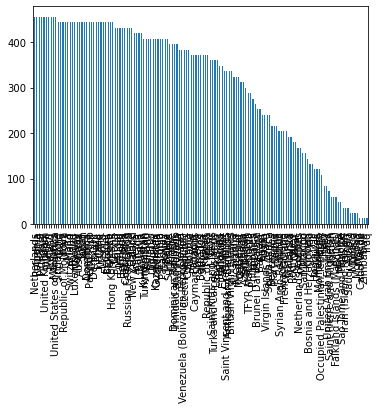

In [61]:
df['Año'].value_counts().plot.bar()

En la parte de arriba nos marco error al igual que en el ejemplo que tenemos en ghitub, esto se debe principalmente a la cantidad de datos que tenemos y que aparte algunos son numericos y otros no, la forma de corregirlo fue agregar el value_counts y haci tuvieramos una grafica mas representativa pero debido a que tiene una gran cantidad de datos, su vizualizacion no se aprecia del todo.

<AxesSubplot:>

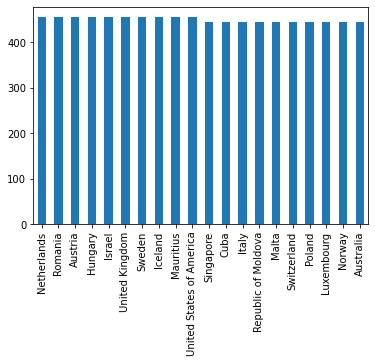

In [66]:
df['País'].value_counts().head(20).plot.bar()

Para poder tener una mejor vizualicacion reducimos el numero de paises a 20, y aqui nos muestra la informacion mucho mas detallada y clara. Tambien podemos ver que todos estos paises que nos muestran tienen un gran numero de suicidios

<AxesSubplot:>

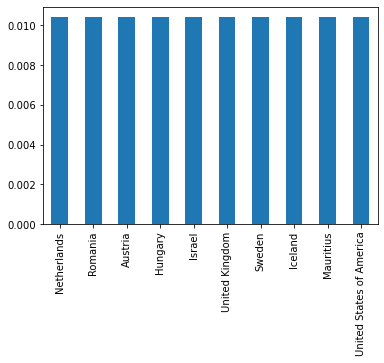

In [69]:
(df['País'].value_counts().head(10) / len(df)).plot.bar()

<AxesSubplot:>

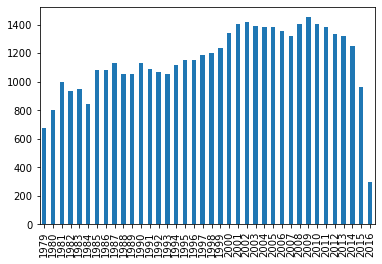

In [72]:
df['Año'].value_counts().sort_index().plot.bar()

La gradica de arriba nos representa la cantidad de registros que se tienen en ese año de suicidios, como podemos ver en el año 2016 excisten pocos registros porque la base de datos tiene su corte en 2016, (no quiere decir que se tuvieron menos o mas sucidios solo que el numero de registros es menor)

<AxesSubplot:>

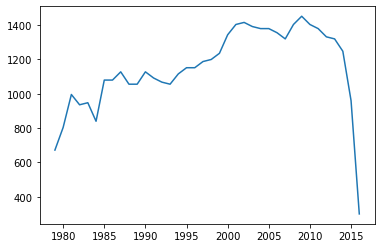

In [74]:
df['Año'].value_counts().sort_index().plot.line()

Aqui podemos ver la representacion de la grafica anterior pero en grafico de linea y no de barra.

<AxesSubplot:>

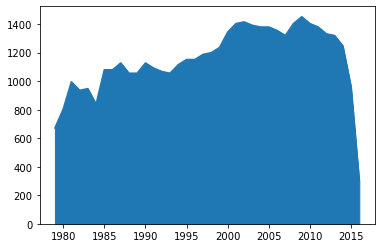

In [75]:
df['Año'].value_counts().sort_index().plot.area()

En esta grafica cambiamos line por area para que hace nos muestre la parte de adentro rellena.

### Histogramas

<AxesSubplot:ylabel='Frequency'>

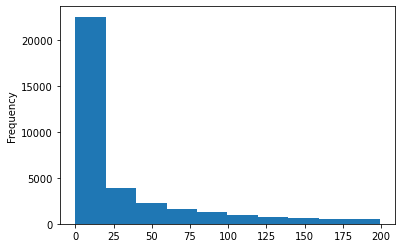

In [83]:
df[df['Número_De_Suicidios'] < 200]['Número_De_Suicidios'].plot.hist()

Aqui podemos observar el histograma dividido en intervalor de igual tamaño.

<AxesSubplot:ylabel='Frequency'>

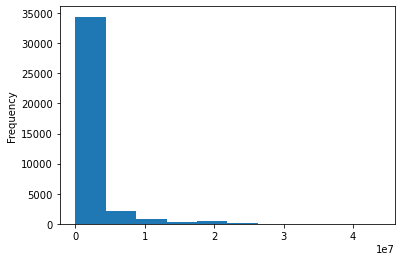

In [87]:
df['Población'].plot.hist()

### Graficar Datos bi-Variantes

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

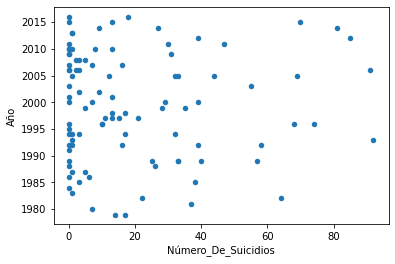

In [94]:
df[df['Número_De_Suicidios'] < 100].sample(100).plot.scatter(x='Número_De_Suicidios', y='Año')

Con esta grafica podemos observar donde se encuentra una dispersion fuerte de tegistros de suicios en ciertos años.

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

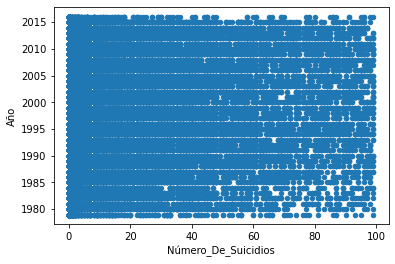

In [95]:
df[df['Número_De_Suicidios'] < 100].plot.scatter(x='Número_De_Suicidios', y='Año')

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

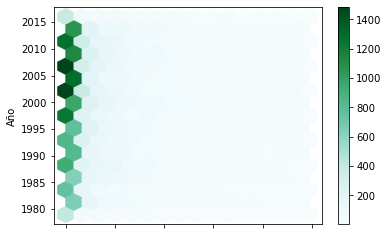

In [96]:
df[df['Número_De_Suicidios'] < 100].plot.hexbin(x='Número_De_Suicidios', y='Año', gridsize=15)

<AxesSubplot:xlabel='Número_De_Suicidios', ylabel='Año'>

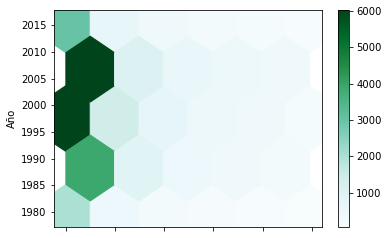

In [98]:
df[df['Número_De_Suicidios'] < 100].plot.hexbin(x='Número_De_Suicidios', y='Año', gridsize=5)

Aqui podemos observar que conforme avanza el tiempo se van registrando mas numeros de suicidios por año aunque en la parte mas alta muestre un color mas tenue se debe principalmente a que corta en 2016 y no se cuentan cn muchos registros.

### Stacked plots

In [107]:
df.plot.bar()

KeyboardInterrupt: 

Debido a que la cantidad de datos en nuestra base de datos es muy grande, tenemos problemas al correrla en nuestras computadoras y le tuvimos que dar en cancelar para seguir con las graficas (Solo nos ha pasado con esta grafica).

<AxesSubplot:>

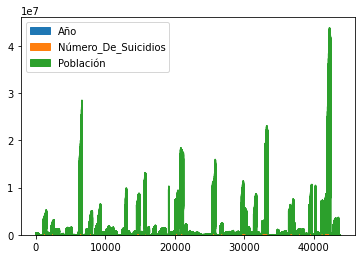

In [102]:
df.plot.area()

Aqui no se parecian las otras variables del todo debido que la cantidad de datos es muy grande y los numeros de nuestra poblacion tambien lo es.

<AxesSubplot:>

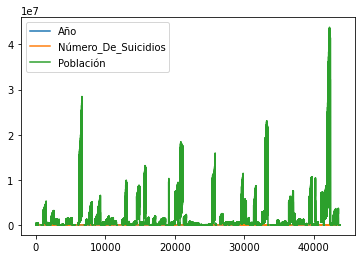

In [109]:
df.plot.line()

Aqui son lineas pero por el tamaño de nuestra poblacion, se ve como si estubieran rellenas.

In [11]:
import seaborn as sns

C:\Users\SERGIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rango_De_Edad', ylabel='count'>

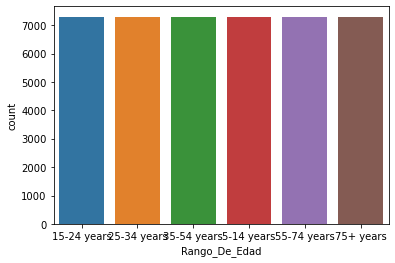

In [114]:
sns.countplot(df['Rango_De_Edad'])

Aqui podemos ver los registros por rango de edad

<AxesSubplot:xlabel='Año', ylabel='Density'>

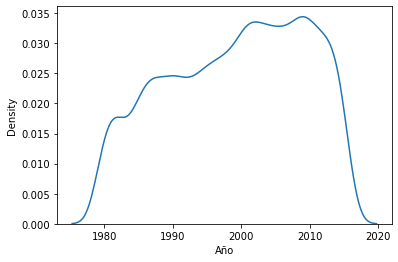

In [117]:
sns.kdeplot(df.query('Número_De_Suicidios < 200').Año)

Podemos observar la densidad del numero de suicidios por año

<AxesSubplot:>

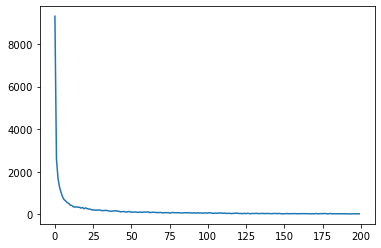

In [118]:
df[df['Número_De_Suicidios'] < 200]['Número_De_Suicidios'].value_counts().sort_index().plot.line()

In [127]:
sns.kdeplot(df[df['Año'] < 3000].loc[:, ['Año', 'Número_De_Suicidios']].dropna().sample(100))

ValueError: If using all scalar values, you must pass an index

Aqui nos marca un error porque nos pide que para escalares pasemos un dice pero el indice se supone que esta predeterminado en 0

C:\Users\SERGIO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Número_De_Suicidios'>

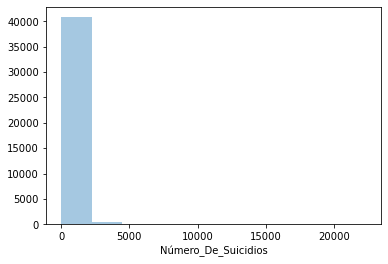

In [128]:
sns.distplot(df['Número_De_Suicidios'], bins=10, kde=False)

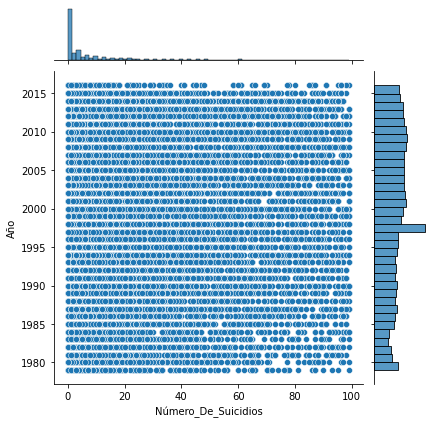

In [131]:
sns.jointplot(x='Número_De_Suicidios', y='Año', data=df[df['Número_De_Suicidios'] < 100])

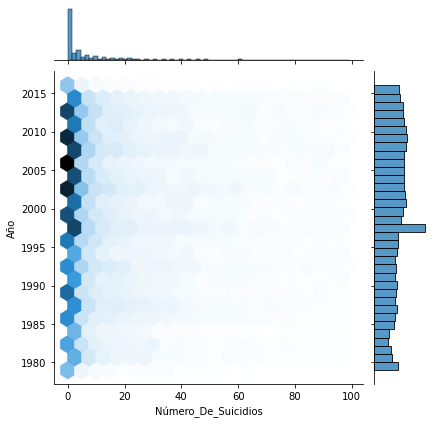

In [132]:
sns.jointplot(x='Número_De_Suicidios', y='Año', data=df[df['Número_De_Suicidios'] < 100], kind='hex', 
              gridsize=20)

### Box Splots

<AxesSubplot:xlabel='País', ylabel='Número_De_Suicidios'>

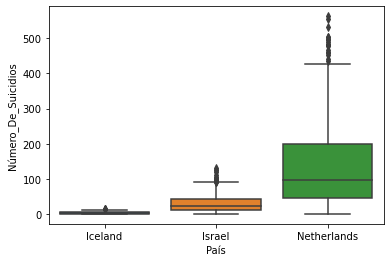

In [14]:
df2 = df[df.País.isin(df.País.value_counts().head(3).index)]

sns.boxplot(
    x='País',
    y='Número_De_Suicidios',
    data=df2
)

Aqui podemos ver el numero de registros que existen en nuestra base de datos de ciertos paises.

In [27]:
sns.violinplot(
    x='País',
    y='Número_De_Suicidios',
    data=df[df.País.isin(df.País.value_counts()[:5].index)]
)

<AxesSubplot:xlabel='País', ylabel='Número_De_Suicidios'>

AttributeError: module 'numpy' has no attribute 'matrix'

<Figure size 432x288 with 1 Axes>

In [39]:
import pandas as pd
import pandas_profiling
df = pd.read_csv("/Users/SERGIO/Documents/Mineria de datos/who_suicide_statistics.csv")
df.head()

ModuleNotFoundError: No module named 'pandas_profiling'

En esta parte tuvimos problemas con el pandas_profiling

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Número_De_Suicidios', y='Año', hue='Género', 
           data=df.loc[df['Género'].isin(['male', 'female'])], 
           fit_reg=False)

AttributeError: module 'numpy' has no attribute 'matrix'

AttributeError: module 'numpy' has no attribute 'matrix'

<Figure size 360x360 with 1 Axes>